# NADHYA HASSNI
# 09011381722090
# IMPLEMENTASI NEURAL NETWORK DALAM MENDETEKSI ARRHYTHMIA

 Aritmia adalah suatu tanda atau gejala dari gangguan detak jantung atau irama jantung. Hal ini bisa dirasakan ketika misalnya, jantung berdetak lebih cepat dari normal yang selanjutnya disebut takikardia atau ketika jantung berdetak lebih lambat dari normal, yang disebut sebagai bradikardia. Jantung yang berdenyut melambat tentu akan mengganggu aliran darah sampai ke otak sehingga penderitanya sewaktu-waktu dapat pingsan. Sebaliknya, jika jantung berdenyut terlalu cepat dalam jangka yang lama maka dapat mengarah pada gagal jantung kongestif yang tentunya sangat berbahaya. Aritmia timbul bilamana penghantaran listrik pada jantung yang mengontrol detak jantung mengalami gangguan, ini dapat terjadi bila sel saraf khusus yang ada pada jantung yang bertugas menghantarkan listrik tersebut tidak bekerja dengan baik. Aritmia juga dapat terjadi bila bagian lain dari jantung menghantarkan sinyal listrik yang abnormal.

# data set :
https://www.kaggle.com/alexandrefarb/mitbih-arrhythmia-database-de-chazal-class-labels

DATA SET YANG DIGUNAKAN

DS1_LABEL dan DS1_SIGNAL

    dengan keterangan 
    0 : normal 
    1 : Supraventricular ectopic beat
    yang di potong menjadi 976 data 1 dan 975 data 0
Supraventricular ectopic beat adalah  (AES, SVES, APB) adalah detak jantung yang terjadi lebih awal dari normal dan berasal dari salah satu atrium di luar simpul sinoatrial.Gelombang P dari detak ektopik atrium berbeda dari detak yang berasal dari sinus normal, tetapi kompleks QRS biasanya mirip dengan irama normal.

PAPER : https://www.nature.com/articles/s41591-018-0268-3

# Import Library
langkah awal yang harus kitalakukan adalam mengimport library-library yang dubutuhkan saat mengolah data seperti :
- Library Numpy 
    berfungsi untuk mengolah data dalam bentuk angka (array)
    
    
- Library Matplotlib 
    berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
    
    
- Library Sklearn 
    digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam 
    jaringan saraf
    
    
- Library Pandas
    Berfungsi untuk membaca file dataset dalam bentuk .CSV
    
    
- Library Seaborn
    berfungsi untuk membantu visualisasi dataset

In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# PERSIAPAN DATA

In [3]:
dataset=pd.read_csv("DATA_FULLL.csv", delimiter=";")
dataset.head()

,0.96582,0.96777,0.96729,0.96826,0.96973,0.9668,0.96533,0.96729.1,0.96875,0.97021,...,0.97314.2,0.9751.2,0.97656.3,0.9751.3,0.97607,0.97705.2,0.97852.1,0.97949.2,0.97949.3,HASIL
0,0.97412,0.97314,0.97363,0.97314,0.97314,0.97314,0.97461,0.97412,0.97314,0.97217,...,0.97168,0.97119,0.97266,0.97510,0.97705,0.97607,0.97607,0.97705,0.97803,0
1,0.96240,0.96289,0.96484,0.96631,0.96631,0.96436,0.96338,0.96240,0.96533,0.96582,...,0.96094,0.96143,0.95996,0.96094,0.96289,0.96533,0.96533,0.96338,0.96533,0
2,0.95898,0.95996,0.96094,0.96045,0.95898,0.95898,0.95801,0.95947,0.96094,0.95996,...,0.96289,0.96387,0.96387,0.96289,0.96387,0.96533,0.96631,0.96533,0.96631,0
3,0.96973,0.97070,0.96875,0.96875,0.96777,0.96826,0.96973,0.96875,0.96924,0.96924,...,0.95264,0.95410,0.95605,0.95703,0.95703,0.95605,0.95459,0.95557,0.95654,0
4,0.95654,0.95654,0.95459,0.95410,0.95459,0.95459,0.95459,0.95361,0.95313,0.95313,...,0.95410,0.95410,0.95605,0.95654,0.95703,0.95752,0.95654,0.95654,0.95752,0


In [4]:
dataset.shape

(46799, 181)

In [5]:
dataset.isnull()

,0.96582,0.96777,0.96729,0.96826,0.96973,0.9668,0.96533,0.96729.1,0.96875,0.97021,...,0.97314.2,0.9751.2,0.97656.3,0.9751.3,0.97607,0.97705.2,0.97852.1,0.97949.2,0.97949.3,HASIL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Perbandingan data normal dan Supraventricular ectopic beat

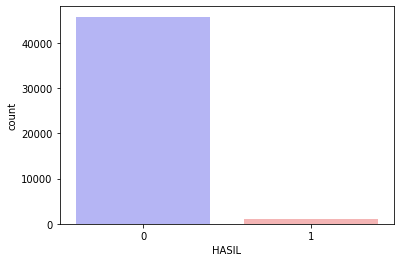

In [7]:
sns.countplot(x="HASIL", data=dataset, palette="bwr")
plt.show()

In [8]:
dataset.HASIL.value_counts()

0    45823
1      976
Name: HASIL, dtype: int64

In [9]:
dataset.isnull().sum()

0.96582       0
0.96777       0
0.96729       0
0.96826       0
0.96973       0
0.9668        0
0.96533       0
0.96729.1     0
0.96875       0
0.97021       0
0.96973.1     0
0.96924       0
0.96875.1     0
0.96582.1     0
0.96924.1     0
0.96875.2     0
0.96875.3     0
0.96875.4     0
0.96875.5     0
0.96875.6     0
0.96973.2     0
0.96973.3     0
0.96924.2     0
0.96924.3     0
0.96973.4     0
0.97119       0
0.97266       0
0.97266.1     0
0.97168       0
0.97119.1     0
             ..
0.9624.6      0
0.96387.3     0
0.96484.3     0
0.96436.1     0
0.96436.2     0
0.96338.3     0
0.96289.1     0
0.96533.4     0
0.9668.3      0
0.9668.4      0
0.96729.3     0
0.96631       0
0.96729.4     0
0.96875.10    0
0.96924.7     0
0.96777.1     0
0.96924.8     0
0.96777.2     0
0.96924.9     0
0.9707.3      0
0.97314.2     0
0.9751.2      0
0.97656.3     0
0.9751.3      0
0.97607       0
0.97705.2     0
0.97852.1     0
0.97949.2     0
0.97949.3     0
HASIL         0
Length: 181, dtype: int6

In [10]:
dataset=dataset.dropna()

In [11]:
dataset.isnull().sum()

0.96582       0
0.96777       0
0.96729       0
0.96826       0
0.96973       0
0.9668        0
0.96533       0
0.96729.1     0
0.96875       0
0.97021       0
0.96973.1     0
0.96924       0
0.96875.1     0
0.96582.1     0
0.96924.1     0
0.96875.2     0
0.96875.3     0
0.96875.4     0
0.96875.5     0
0.96875.6     0
0.96973.2     0
0.96973.3     0
0.96924.2     0
0.96924.3     0
0.96973.4     0
0.97119       0
0.97266       0
0.97266.1     0
0.97168       0
0.97119.1     0
             ..
0.9624.6      0
0.96387.3     0
0.96484.3     0
0.96436.1     0
0.96436.2     0
0.96338.3     0
0.96289.1     0
0.96533.4     0
0.9668.3      0
0.9668.4      0
0.96729.3     0
0.96631       0
0.96729.4     0
0.96875.10    0
0.96924.7     0
0.96777.1     0
0.96924.8     0
0.96777.2     0
0.96924.9     0
0.9707.3      0
0.97314.2     0
0.9751.2      0
0.97656.3     0
0.9751.3      0
0.97607       0
0.97705.2     0
0.97852.1     0
0.97949.2     0
0.97949.3     0
HASIL         0
Length: 181, dtype: int6

# NORMALISASI DATA 

In [12]:
features = dataset.iloc[:, dataset.columns != 'HASIL']
labels = dataset.iloc[:, dataset.columns == 'HASIL']

In [13]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

#  MODELING

### Splitting Data
1. training_data = Inisialisasi Data Features Menjadi Data Training
2. testing_data = Inisialisasi Data Features  Menjadi Data Testing
3. training_label = Inisialisasi Data Labels Menjadi Data Training
4. testing_label = Inisialisasi Data Labels Menjadi Data Testing
5. train_test_split () = Digunakan Untuk Memilah Data. Data Tersebut Akan Terbagi Menjadi Data Training Dan Data Testing Dari Data Features Dan Labels

In [14]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [15]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=550, epochs=400)
acc_testing  = model.evaluate(testing_data, testing_label) 


Train on 37439 samples, validate on 9360 samples
Epoch 1/400
37439/37439 [==============================] - 2s 62us/step - loss: 0.4744 - accuracy: 0.7444 - val_loss: 0.1186 - val_accuracy: 0.9792
Epoch 2/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.1227 - accuracy: 0.9789 - val_loss: 0.1068 - val_accuracy: 0.9792
Epoch 3/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.1167 - accuracy: 0.9791 - val_loss: 0.1063 - val_accuracy: 0.9792
Epoch 4/400
37439/37439 [==============================] - 1s 15us/step - loss: 0.1141 - accuracy: 0.9791 - val_loss: 0.1057 - val_accuracy: 0.9792
Epoch 5/400
37439/37439 [==============================] - 1s 14us/step - loss: 0.1132 - accuracy: 0.9791 - val_loss: 0.1045 - val_accuracy: 0.9792
Epoch 6/400
37439/37439 [==============================] - 1s 14us/step - loss: 0.1110 - accuracy: 0.9791 - val_loss: 0.1039 - val_accuracy: 0.9792
Epoch 7/400
37439/37439 [==============================] - 1s 

37439/37439 [==============================] - 0s 13us/step - loss: 0.0754 - accuracy: 0.9822 - val_loss: 0.0770 - val_accuracy: 0.9825
Epoch 110/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0760 - accuracy: 0.9826 - val_loss: 0.0762 - val_accuracy: 0.9826
Epoch 111/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0760 - accuracy: 0.9821 - val_loss: 0.0770 - val_accuracy: 0.9823
Epoch 112/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0749 - accuracy: 0.9825 - val_loss: 0.0763 - val_accuracy: 0.9824
Epoch 113/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0766 - accuracy: 0.9821 - val_loss: 0.0764 - val_accuracy: 0.9824
Epoch 114/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0777 - accuracy: 0.9824 - val_loss: 0.0765 - val_accuracy: 0.9827
Epoch 115/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0759 - accuracy: 0.9823 - val_

Epoch 218/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0688 - accuracy: 0.9840 - val_loss: 0.0783 - val_accuracy: 0.9822
Epoch 219/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0683 - accuracy: 0.9843 - val_loss: 0.0777 - val_accuracy: 0.9822
Epoch 220/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0682 - accuracy: 0.9845 - val_loss: 0.0783 - val_accuracy: 0.9818
Epoch 221/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0676 - accuracy: 0.9844 - val_loss: 0.0789 - val_accuracy: 0.9816
Epoch 222/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0669 - accuracy: 0.9845 - val_loss: 0.0795 - val_accuracy: 0.9821
Epoch 223/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0673 - accuracy: 0.9844 - val_loss: 0.0787 - val_accuracy: 0.9821
Epoch 224/400
37439/37439 [==============================] - 0s 13us/step - loss: 0.0672 - accuracy:

Epoch 327/400
37439/37439 [==============================] - 1s 15us/step - loss: 0.0630 - accuracy: 0.9851 - val_loss: 0.0812 - val_accuracy: 0.9816
Epoch 328/400
37439/37439 [==============================] - 1s 30us/step - loss: 0.0629 - accuracy: 0.9849 - val_loss: 0.0803 - val_accuracy: 0.9818
Epoch 329/400
37439/37439 [==============================] - 1s 18us/step - loss: 0.0631 - accuracy: 0.9850 - val_loss: 0.0814 - val_accuracy: 0.9823
Epoch 330/400
37439/37439 [==============================] - 1s 18us/step - loss: 0.0634 - accuracy: 0.9847 - val_loss: 0.0823 - val_accuracy: 0.9819
Epoch 331/400
37439/37439 [==============================] - 1s 18us/step - loss: 0.0629 - accuracy: 0.9850 - val_loss: 0.0839 - val_accuracy: 0.9817
Epoch 332/400
37439/37439 [==============================] - 1s 15us/step - loss: 0.0630 - accuracy: 0.9846 - val_loss: 0.0813 - val_accuracy: 0.9823
Epoch 333/400
37439/37439 [==============================] - 1s 14us/step - loss: 0.0637 - accuracy:

In [17]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9818376302719116


Dapat kita lihat bahwa akurasi yang didapatkan cukup besar sebesar 98.1%

In [18]:
acc_training.history

{'val_loss': [0.11855119285691115,
  0.10681518147954255,
  0.10632882286838263,
  0.10569489479331602,
  0.10450485846501353,
  0.10387150542392658,
  0.10327738188565351,
  0.10285444381750292,
  0.10203679730323677,
  0.10078984855785647,
  0.10034380360450755,
  0.09971834509434481,
  0.0985116214157106,
  0.09712313492702813,
  0.09623964035756186,
  0.09571240947812669,
  0.0950637553165802,
  0.09457177330707955,
  0.09380278121640222,
  0.09336753419210386,
  0.09257564746623492,
  0.09205180859495686,
  0.09141855516160528,
  0.09071749082615232,
  0.08988560690409225,
  0.0895413697585782,
  0.08889498504706556,
  0.08821895664645375,
  0.08777750512728325,
  0.08725343544521712,
  0.0869632233849639,
  0.08615230852897224,
  0.08572137658086279,
  0.08522302481051311,
  0.08477463369042827,
  0.08453982824491513,
  0.08398539858320966,
  0.08380219957027106,
  0.08354604970982187,
  0.08329318665787896,
  0.08308079364733437,
  0.08285980445579585,
  0.08294586503368795,
  0

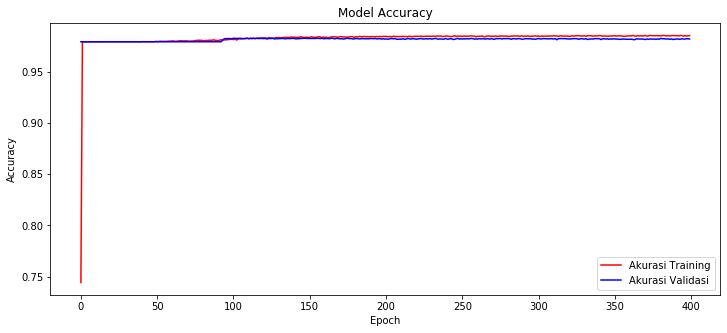

In [19]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

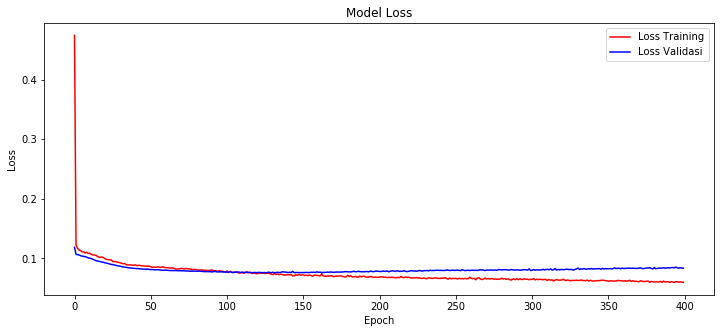

In [22]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

### tetapi dari hasil akurasi yang besar dapat kita lihat grafik perbandingan hasil training dan validasi tidak baik maka dari itu dibutuhkan coding tambahan untuk menormalisasikan data agar lebih seimbang. karena dapat kita lihat di penampilan data di atas bawah perbandingan data 0 dan 1 dangat jauh sekali

In [23]:
features_resample, labels_resample = SMOTE().fit_sample(features,labels.values.ravel())
labels_resample = pd.DataFrame(labels_resample)
features_resample = pd.DataFrame(features_resample)
features_train, features_test, labels_train, labels_test = train_test_split(features_resample,labels_resample,test_size=0.25)
features_train = np.array(features_train)
features_test = np.array(features_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
acc_training = model.fit(features_train, labels_train, validation_data=(features_test, labels_test), batch_size=550, epochs=400)
acc_testing  = model.evaluate(features_test, labels_test)

Train on 68734 samples, validate on 22912 samples
Epoch 1/400
68734/68734 [==============================] - 2s 32us/step - loss: 0.5361 - accuracy: 0.7162 - val_loss: 0.3960 - val_accuracy: 0.8195
Epoch 2/400
68734/68734 [==============================] - 1s 14us/step - loss: 0.4258 - accuracy: 0.7926 - val_loss: 0.3580 - val_accuracy: 0.8413
Epoch 3/400
68734/68734 [==============================] - 1s 14us/step - loss: 0.4048 - accuracy: 0.8082 - val_loss: 0.3463 - val_accuracy: 0.8482
Epoch 4/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.3931 - accuracy: 0.8154 - val_loss: 0.3366 - val_accuracy: 0.8516
Epoch 5/400
68734/68734 [==============================] - 1s 14us/step - loss: 0.3850 - accuracy: 0.8195 - val_loss: 0.3291 - val_accuracy: 0.8540
Epoch 6/400
68734/68734 [==============================] - 1s 15us/step - loss: 0.3734 - accuracy: 0.8251 - val_loss: 0.3245 - val_accuracy: 0.8544
Epoch 7/400
68734/68734 [==============================] - 1s 

Epoch 56/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2244 - accuracy: 0.9008 - val_loss: 0.2138 - val_accuracy: 0.9121
Epoch 57/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2218 - accuracy: 0.9024 - val_loss: 0.2106 - val_accuracy: 0.9151
Epoch 58/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2209 - accuracy: 0.9023 - val_loss: 0.2100 - val_accuracy: 0.9144
Epoch 59/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2206 - accuracy: 0.9025 - val_loss: 0.2102 - val_accuracy: 0.9148
Epoch 60/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2197 - accuracy: 0.9024 - val_loss: 0.2102 - val_accuracy: 0.9148
Epoch 61/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2186 - accuracy: 0.9045 - val_loss: 0.2135 - val_accuracy: 0.9138
Epoch 62/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.2177 - accuracy: 0.9058

Epoch 111/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1838 - accuracy: 0.9219 - val_loss: 0.1853 - val_accuracy: 0.9327
Epoch 112/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1841 - accuracy: 0.9217 - val_loss: 0.1879 - val_accuracy: 0.9332
Epoch 113/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1822 - accuracy: 0.9226 - val_loss: 0.1892 - val_accuracy: 0.9320
Epoch 114/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1819 - accuracy: 0.9231 - val_loss: 0.1863 - val_accuracy: 0.9327
Epoch 115/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1809 - accuracy: 0.9238 - val_loss: 0.1855 - val_accuracy: 0.9320
Epoch 116/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1803 - accuracy: 0.9235 - val_loss: 0.1826 - val_accuracy: 0.9357
Epoch 117/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1806 - accuracy:

Epoch 220/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1521 - accuracy: 0.9372 - val_loss: 0.1775 - val_accuracy: 0.9459
Epoch 221/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1488 - accuracy: 0.9396 - val_loss: 0.1729 - val_accuracy: 0.9468
Epoch 222/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1498 - accuracy: 0.9389 - val_loss: 0.1734 - val_accuracy: 0.9472
Epoch 223/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1496 - accuracy: 0.9390 - val_loss: 0.1771 - val_accuracy: 0.9424
Epoch 224/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1479 - accuracy: 0.9389 - val_loss: 0.1754 - val_accuracy: 0.9464
Epoch 225/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1468 - accuracy: 0.9400 - val_loss: 0.1903 - val_accuracy: 0.9399
Epoch 226/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1473 - accuracy:

Epoch 329/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1302 - accuracy: 0.9474 - val_loss: 0.1774 - val_accuracy: 0.9511
Epoch 330/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1297 - accuracy: 0.9477 - val_loss: 0.1716 - val_accuracy: 0.9547
Epoch 331/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1300 - accuracy: 0.9471 - val_loss: 0.1762 - val_accuracy: 0.9526
Epoch 332/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1301 - accuracy: 0.9477 - val_loss: 0.1746 - val_accuracy: 0.9526
Epoch 333/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1291 - accuracy: 0.9476 - val_loss: 0.1737 - val_accuracy: 0.9528
Epoch 334/400
68734/68734 [==============================] - 1s 13us/step - loss: 0.1297 - accuracy: 0.9478 - val_loss: 0.1775 - val_accuracy: 0.9530
Epoch 335/400
68734/68734 [==============================] - 1s 15us/step - loss: 0.1314 - accuracy:

In [24]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9546089172363281


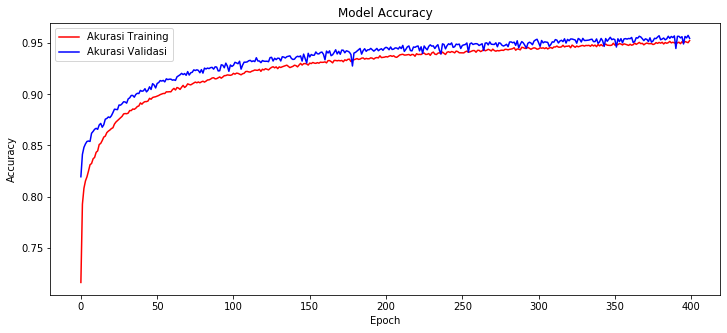

In [25]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

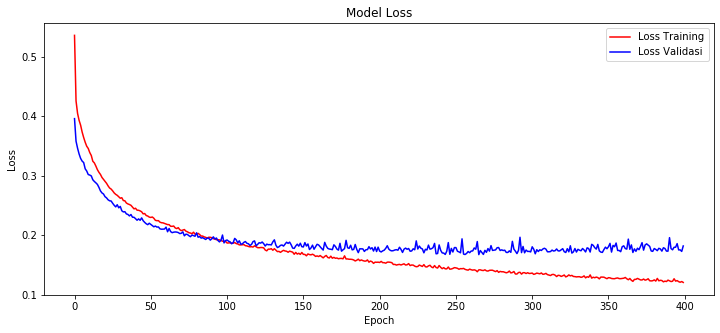

In [26]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')


# Confusion matrix

adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

### Confusion Matriks memiliki 4 instilah yaitu

    - True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

    - Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

    - Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

    - Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah)..



In [34]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [35]:
training_predicted.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [36]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

coding diatas berfungsi untuk mengimport library Confusion Matrix yang akan digunakan di langkah selanjutnya. Matriks Confusion disini terdiri dari 2 jenis, yakni Training_cm (Matriks Confusion untuk data trainig) dan Testing_cm (Matriks Confusion untuk data testing)

In [37]:
training_cm

array([[34461,  2197],
       [   55,   726]], dtype=int64)

 matrik confusion (Training_cm), menunjukan nilai :


    TP bernilai 34461 data
    FP bernilai 2197 data
    FN bernila 55 data
    TN bernilai 726 data



In [38]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9398488207484175
Specificity training 0.9295774647887324
Sensitivity training 0.9400676523541928
Precision training 0.9984065360992004
F1 Score training 0.9683592323039312




    Nilai accuracy dapat dicari dengan menggunakan rumus = (tp+tn)/(tp+tn+fp+fn)
    Nilai specificity dapat dicari dengan menggunakan rumus = tn/(tn+fp)
    Nilai sensitivity dapat dicari dengan menggunakan rumus = tp/(tp+fn)
    Nilai precision dapat dicari dengan menggunakan rumus = tp/(tp+fp)
    Nilai f1_score dapat dicari dengan menggunakan rumus = (2 Sensitivityprecision)/(sensitivity+precision)



In [39]:
testing_cm

array([[8629,  536],
       [  11,  184]], dtype=int64)

 matrik confusion (testing_cm), menunjukan nilai :


    TP bernilai 8629 data
    FP bernilai 536 data
    FN bernila 11 data
    TN bernilai 184 data

In [40]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.941559829059829
Specificity testing 0.9435897435897436
Sensitivity testing 0.9415166393889798
Precision testing 0.9987268518518518
F1 Score testing 0.969278292614434




    Nilai accuracy dapat dicari dengan menggunakan rumus = (tp+tn)/(tp+tn+fp+fn)
    Nilai specificity dapat dicari dengan menggunakan rumus = tn/(tn+fp)
    Nilai sensitivity dapat dicari dengan menggunakan rumus = tp/(tp+fn)
    Nilai precision dapat dicari dengan menggunakan rumus = tp/(tp+fp)
    Nilai f1_score dapat dicari dengan menggunakan rumus = (2 Sensitivityprecision)/(sensitivity+precision)

